**Tutorials used for reference:** 

http://matlabdatamining.blogspot.com/2010/02/principal-components-analysis.html

http://www.nlpca.org/pca-principal-component-analysis-matlab.html

http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

# Introduction / Dataset

In this example, we will demonstrate the usefulness of applying principle component analysis (PCA) to a dataset. We will be using the Fisher Iris dataset. It contains measurements of 3 different species of iris flowers (150 flowers total, 50 in each category, 4 predictors/measurements per example). The measurements include: petal length, petal width, sepal length, and sepal width. We are interested being able to classify an iris flower into one of the 3 species based on these measurements. We will first view the raw data. Then we will apply PCA and observe the difference it makes.

---

First we need to import the libraries we depend on.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

We can load the dataset with load_iris. There will be two components to our variable 'irisData'. irisData.data will contain the observation data, and the irisData.target will contain the class labels. Uncomment the print code to view each's structure.

In [3]:
irisData = datasets.load_iris()

Now lets take a quick look at a couple plots of the raw data and observe patterns. We'll plot setosas as purple, versicolors as blue, and virginicas as yellow. We'll plot the 4 different combinations of attributes against each other.

---

First, lets extract each attribute individually.

In [4]:
petLen = irisData.data[:,0]
petWid = irisData.data[:,1]
sepLen = irisData.data[:,2]
sepWid = irisData.data[:,3]
labels = irisData.target

Text(0,0.5,'Petal Width')

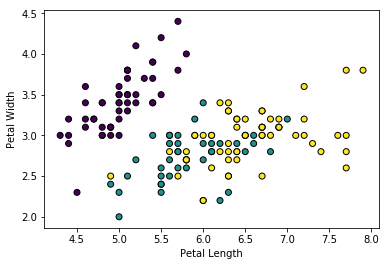

In [5]:
plt.scatter(petLen, petWid, c=labels, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0,0.5,'Sepal Width')

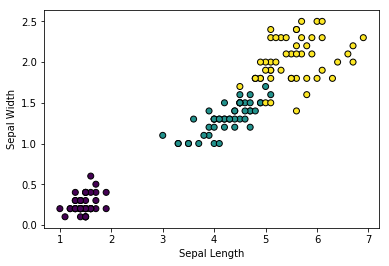

In [6]:
plt.scatter(sepLen, sepWid, c=labels, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0,0.5,'Sepal Width')

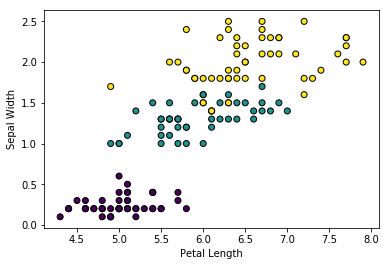

In [7]:
plt.scatter(petLen, sepWid, c=labels, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')

On the last plot we are adding a small ammount of randomness to the data. This creates a more realistic looking scatter, and it uncovers points that lay on top of one another.

Text(0,0.5,'Petal Width')

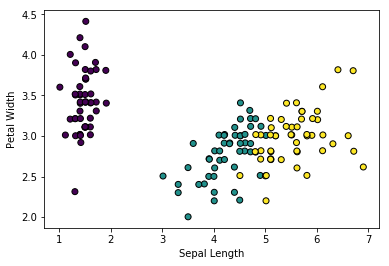

In [8]:
plt.scatter(sepLen + np.random.rand(150) * 0.02, petWid + np.random.rand(150) * 0.02, c=labels, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

We've now plotted our datapoints from all 4 combinations of 2 variables out of 4. It's clear that there is quite a bit of overlap between classes, particularly between virginica and vesicolor. If you were given a new observation and it fell within the overlapping zones, you wouldn't know how to classify it. Once we apply PCA, this problem will be reduced greatly. Because we will be using two heavily information-loaded variables rather than any two of the original ones. 

# Principal Component Analysis

Now lets apply PCA to the dataset. First, lets collect some general information that will be useful later.

In [9]:
n, m = irisData.data.shape
dataMean = np.mean(irisData.data, axis=0)
dataStd = np.std(irisData.data, axis=0)

It is important to preprocess the data a bit in PCA. Usually we subtract the mean from each observation, and optionally, divide each by the standard deviation. Subtracting the mean centers the data on 0, and dividing by the standard deviation normalizes the data.

In [10]:
centeredData = irisData.data - dataMean
#centeredData = np.divide(irisData.data, dataStd)

The main idea behind PCA is to take the dataset from the original coordinate system, to a coordinate system where the variance of the data is maximized. In order to this, we take the eigenfunction of the data's covariance matrix. The eigenvectors will be the principal component coefficients, and the corresponding eigenvalues correspond to the ammount of variance their respective principal component encapsulates.

In [41]:
vrs, coeffs = np.linalg.eig(np.cov(centeredData.T))

The eig function does not necessarily give the eigenvalue-eigenvector pairs in a particular order. We need to sort them in decreasing order so that the principal components with the largest ammount of variance come first.

In [42]:
order = np.argsort(-vrs)     #negative gets descending order
vrs = np.array(vrs)[order]
coeffs = np.array(coeffs)[order]

Now we are set up to take the data from it's original coordinate system to the PCA coordinate system. All we have to do is multiply the data matrix with the principal component coefficient matrix.

In [43]:
pcaData = centeredData.dot(coeffs)

So now we've obtained the principal components of the data. The columns of pcaData correspond to the principal components (col1 = principal component1 ect). Lets look at some plots to illustrate what we've done.


# Plotting the Transformed Data

First, we look at the first 3 principal components (PC) individually. What we see is that the overlapping area of the classes gets wider as we progress. This corresponds to the ammount of variance captured by each PC.

Text(0.5,1,'Principal Component 1')

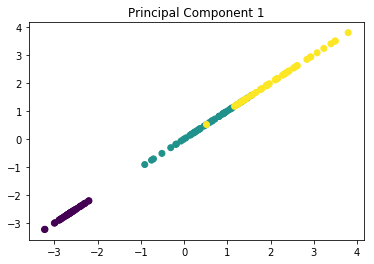

In [45]:
plt.scatter(pcaData[:, 0], pcaData[:, 0], c=labels)
plt.title('Principal Component 1')

Text(0.5,1,'Principal Component 2')

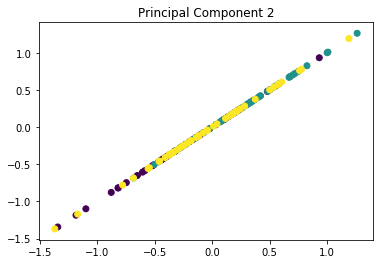

In [46]:
plt.scatter(pcaData[:, 1], pcaData[:, 1], c=labels)
plt.title('Principal Component 2')

Text(0.5,1,'Principal Component 3')

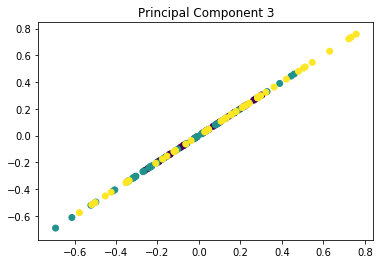

In [47]:
plt.scatter(pcaData[:, 2], pcaData[:, 2], c=labels)
plt.title('Principal Component 3')

Lastly, we look at the first 2 PCs plotted against each other. In this coordinate space, we can see more clearly defined and seperated classes.

Text(0,0.5,'PC2')

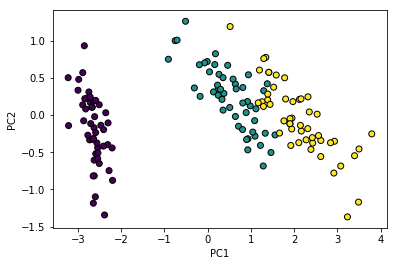

In [49]:
plt.scatter(pcaData[:, 0], pcaData[:, 1], c=labels, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

Additionally, we can calculate the variance that each PC captures as a percentage. This is a useful and often impressive calculation. We do this by dividing the variance of each PC by the total variance of all PCs. 

In [50]:
vrs / sum(vrs)

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

Each column in this matrix corresponds to the variance captured by PC. Amazingly, PC1 captures 92% of the variance by itself. If we keep _k_ PCs, it is important to add these percentages up to know the proportion of variance explained with _k_ variables. This plot will gradually plateau indicating that we have sufficiently many principal components. 

([<matplotlib.axis.XTick at 0x1a1fbe8278>,
 <a list of 4 Text xticklabel objects>)

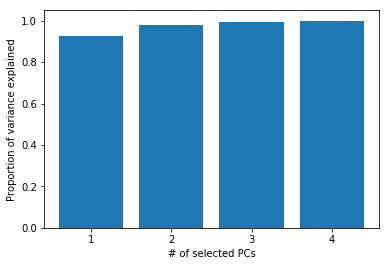

In [79]:
plt.bar(range(1, len(vrs)+1), np.cumsum(vrs)/sum(vrs))
plt.ylabel('Proportion of variance explained')
plt.xlabel('# of selected PCs')
plt.xticks(range(1, len(vrs)+1))

# Classify Test Data
So, we applied PCA to the data and got a graph that seems to make more sense than the raw data. Now we want to put it to use. Say someone wants us to use our PCA technique to classify a few iris flowers for them and they give us petal/sepal dimensions as follows.

In [80]:
testFlowers = np.array([[6.1, 2.7, 5.0, 1.6], [5.3, 3.2, 2.1, 0.4], [7.75, 3.5, 6.1, 2.0]])

The process to classify these new examples is simple. We apply PCA to each example, and determine the class to be the same of it's nearest neighbor. So lets apply PCA.

_Don't forget to subtract the mean of the original data._

In [85]:
centeredTestFlowers = testFlowers - np.mean(testFlowers, axis=0)

After centering, we take the test data to the PCA coordinate space by multiplying it by our original PCA coefficients.

In [86]:
pcaTestData = centeredTestFlowers.dot(coeffs)

Now we can plot the test data over our original PCA graph to see where it lands. Our first test point is a magenta astrisk, the second is the plus, and the last is the x.

Text(0,0.5,'PC2')

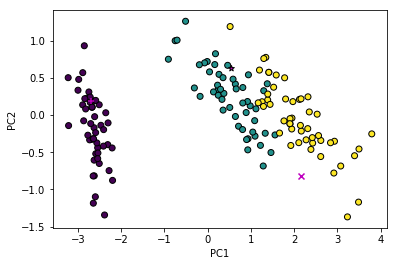

In [163]:
plt.scatter(pcaData[:, 0], pcaData[:, 1], c=labels, edgecolor='k')
plt.scatter(pcaTestData[0,0], pcaTestData[0,1], marker='*', c='m', edgecolor='k')
plt.scatter(pcaTestData[1,0], pcaTestData[1,1], marker='+', c='m', edgecolor='k')
plt.scatter(pcaTestData[2,0], pcaTestData[2,1], marker='x', c='m', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')

Now get the closest neighbor and classify. We do that by getting the distances from our point of interest to every other point, and taking the minimum. The point responsible for that minimum is our nearest neighbor, and tells us which class our new point belongs to.

In [160]:
dists = [[np.linalg.norm(x - pcaTestData[i,:]) for x in pcaData] for i in range(len(pcaTestData))]

for i in range(len(pcaTestData)):
    ind = dists[i].index(min(dists[i]))
    if ind <= 50:
        print('Point',i+1,'belongs to setosa')
    elif ind > 50 and ind <= 100:
        print('Point',i+1,'belongs to versicolor')
    else:
        print('Point',i+1,'belongs to virginica')

Point 1 belongs to versicolor
Point 2 belongs to setosa
Point 3 belongs to virginica


Our test points have now been classified as versicolor, or blue on the graphs, setosa, or purple, and virginica, or yellow. By going back to look at our PC1 vs PC2 graph, we can see that we successfully classified our test set to the nearest neighbor.